# Sean Lahman Baseball Data - Analysis

### Introduction

This is an analysis of Major League Baseball data from 1871 through 2015. The dataset can be found here: http://www.seanlahman.com/baseball-archive/statistics/. The database is very broad, and covers statistics ranging from batting and pitching, to managerial performance and players' college attendance. As such, numerous questions could be asked and investigated, for instance:

    - The relationship a player's height and weight have with batting performance
    - Potential differences in performance between left and right handed pitchers
    - Whether fielding has gotten better or worse in general over time
    - Whether any managers have statistically outperformed their peers
    - Which colleges produce the most highly paid players
    - And many more...
    
I have decided to focus my analysis on batting performance, as even within that narrower data there exist several questions to examine:

    - As above, whether there exists any correlation between a player's physique and his batting performance
    - Whether batting has gotten any better or worse over time, and whether the ratio of singles, doubles, etc. has changed
    - Whether there exists a statistically significant correlation between home-runs and intentional walks
    - Whether successful base stealing correlates with runs
    - And, just for fun: whether any player has been hit by pitches at a statistically significant percentage of at bats 
    

### Analysis

In [2]:
#Imports

import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats as st

In [3]:
#Read batting data CSV into pandas dataframe

path = "C:\\Users\\Josh\\Documents\\Intro to Data Analysis\\baseballdatabank-master\\core\\Batting.csv"
df = pd.read_csv(path)

df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Rename certain columns for legibility and ease of access

df.rename(columns={'G': 'games', 'AB': 'atBats', 'R': 'runs', 'H': 'hits', '2B': 'doubles', '3B': 'triples', 'SB': 'stolenBases',
                   'CS': 'caughtStealing', 'SO': 'strikeOuts', 'IBB': 'intentionalWalks', 'HBP': 'hitByPitch'}, inplace=True)

df.head()

,playerID,yearID,stint,teamID,lgID,games,atBats,runs,hits,doubles,...,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#Report basic descriptive statistics of batting data

df.describe()

C:\Users\Josh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1972.000000,1.000000,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1997.000000,1.000000,80.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


It seems that there are some entries for players where batting data highly relevant to the analysis is unavailable (at bats == NA; RBI == NA; etc.). As this complicates statistical analysis, we will drop the offending entries. Some columns relevant to secondary questions (i.e. whether stealing bases correlates with runs, or whether intentional walks correlate with homeruns) have missing data too, but as roughly 40,000 entries are missing data of one kind or another, we will save cleaning up those more tangential columns for later.

In [6]:
#Drop entries for players missing important statistics

dfComplete = df.dropna(subset=["atBats", "RBI", "stolenBases", "strikeOuts"])

dfComplete.describe()

C:\Users\Josh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
count,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,87045.000000,72669.000000,87045.000000,87045.000000,59560.000000,86142.000000,83830.000000,60104.000000,70029.000000
mean,1969.068011,1.075524,53.444322,147.297662,19.470492,38.664771,6.671078,1.253800,3.177471,17.924200,2.856867,1.325118,13.999644,21.714952,1.214456,1.048060,2.266432,1.151022,3.212141
std,34.675790,0.279122,47.854095,187.144221,28.544526,53.467704,9.951493,2.538928,6.673481,27.061316,7.361527,2.839113,21.476728,28.573003,2.896120,2.215005,4.026757,2.024516,4.836769
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,1.000000,14.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,1975.000000,1.000000,36.000000,54.000000,4.000000,10.000000,1.000000,0.000000,0.000000,4.000000,0.000000,NaN,3.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,1.000000,85.000000,242.000000,29.000000,61.000000,10.000000,1.000000,3.000000,26.000000,2.000000,NaN,20.000000,31.000000,NaN,NaN,NaN,NaN,NaN
max,2015.000000,4.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,130.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


### Question 1: Has batting efficiency, or the ratio of base-hits, doubles, triples, and home-runs, changed over time?

Now let us focus on a single one of the questions asked above: whether batting statistics for all players show any trends over time. To do this we will create a new dataframe: batting_over_time, where all players' batting statistics will be grouped by year.

In [7]:
batting_over_time = dfComplete.groupby('yearID').sum()

batting_over_time.head()

,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,
1871,115,2296,10822.0,2659.0,3101.0,434.0,239.0,47.0,1783.0,441.0,123.0,393.0,175.0,NaN,NaN,NaN,NaN,NaN
1872,169,3307,15679.0,3390.0,4487.0,567.0,139.0,35.0,2103.0,254.0,118.0,247.0,252.0,NaN,NaN,NaN,NaN,NaN
1873,128,3603,16974.0,3580.0,4923.0,556.0,208.0,46.0,2339.0,175.0,99.0,322.0,243.0,NaN,NaN,NaN,NaN,NaN
1874,126,4199,19104.0,3470.0,5226.0,633.0,194.0,40.0,2249.0,226.0,91.0,236.0,345.0,NaN,NaN,NaN,NaN,NaN
1875,247,6249,26833.0,4234.0,6812.0,839.0,273.0,40.0,2710.0,629.0,320.0,249.0,675.0,NaN,NaN,NaN,NaN,NaN


To begin, let's produce a scatterplot of batting efficiency over time. Hits of any description per at-bat seems like a reasonable operational definition of the batting efficiency construct to start with, as it will compensate for differences in number of games played and at-bats each season, as well as variations in frequency for each type of hit (single vs. double, etc., which will be examined later).

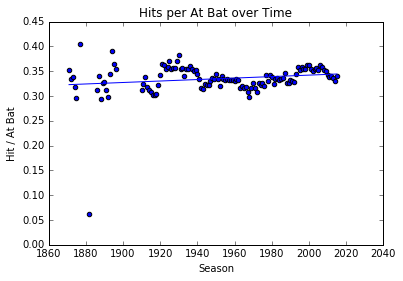

In [8]:
%matplotlib inline

#Plot scatter
x = batting_over_time.index.values
y = ((batting_over_time["hits"] + batting_over_time["doubles"] + batting_over_time["triples"] + batting_over_time["HR"])
     / batting_over_time["atBats"])
plt.scatter(x, y)

plt.title("Hits per At Bat over Time")
plt.xlabel("Season")
plt.ylabel("Hit / At Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

There seems to be an outlier around 1880, where hits/atbat ~ .05 as opposed to ~ .35 in all other seasons. Let's try to find the offending year.

In [9]:
outlier = batting_over_time[((batting_over_time.hits + batting_over_time.doubles + batting_over_time.triples +
                              batting_over_time.HR) / batting_over_time.atBats)  < 0.1]

outlier

,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,
1882,1,5,16.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN


It seems that the dataset only contains entries for 5 games in 1882, which is bizarre, because Wikipedia (https://en.wikipedia.org/wiki/1882_in_baseball) clarifies that a full Major League Baseball season was played in that year. Perhaps there were lots of missing datapoints, and most of the year's entries were dropped when we started to clean up the data. Let's take a look at entries from 1882 in the full dataset.

In [10]:
df[df.yearID == 1882].describe()

C:\Users\Josh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
count,251.0,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,159.000000,126.0,1.0,251.000000,126.000000,1.0,1.0,1.0,0.0,0.0
mean,1882.0,1.091633,41.051793,165.900398,24.282869,41.179283,6.462151,2.486056,0.709163,20.918239,0.0,0.0,6.330677,17.134921,0.0,0.0,0.0,NaN,NaN
std,0.0,0.302605,31.842759,133.393651,24.176262,37.842671,7.165582,3.389809,1.370794,18.087680,0.0,NaN,6.864271,11.424432,NaN,NaN,NaN,NaN,NaN
min,1882.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
25%,1882.0,1.000000,9.000000,32.500000,2.000000,4.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1882.0,1.000000,38.000000,145.000000,16.000000,30.000000,4.000000,1.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1882.0,1.000000,76.000000,308.000000,43.000000,77.000000,11.000000,4.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1882.0,3.000000,86.000000,397.000000,99.000000,129.000000,37.000000,18.000000,7.000000,83.000000,0.0,0.0,29.000000,50.000000,0.0,0.0,0.0,NaN,NaN


As suspected, there is an appropriate number of entries for 1882 in the original data, but many datapoints are missing from those categories we focused on cleaning up earlier. There was always a risk of this happening when dropping NA values; is it possible that other years were mostly dropped during the early wrangling but managed to maintain a relatively consistent hit/atbat ratio? Let's check.

In [11]:
#Calculate mean and standard deviation for at bats for all players per year as a point of reference
atbats = batting_over_time["atBats"].describe()

atbats

count       124.000000
mean     103399.395161
std       42799.582900
min          16.000000
25%       83916.000000
50%       86220.000000
75%      142839.500000
max      167783.000000
Name: atBats, dtype: float64

In [12]:
#Let's take a look at those years with records for at bats below two standard deviations of the mean

batting_over_time[batting_over_time.atBats < 20000]

,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,
1871,115,2296,10822.0,2659.0,3101.0,434.0,239.0,47.0,1783.0,441.0,123.0,393.0,175.0,NaN,NaN,NaN,NaN,NaN
1872,169,3307,15679.0,3390.0,4487.0,567.0,139.0,35.0,2103.0,254.0,118.0,247.0,252.0,NaN,NaN,NaN,NaN,NaN
1873,128,3603,16974.0,3580.0,4923.0,556.0,208.0,46.0,2339.0,175.0,99.0,322.0,243.0,NaN,NaN,NaN,NaN,NaN
1874,126,4199,19104.0,3470.0,5226.0,633.0,194.0,40.0,2249.0,226.0,91.0,236.0,345.0,NaN,NaN,NaN,NaN,NaN
1877,1,17,69.0,16.0,21.0,3.0,3.0,1.0,10.0,0.0,0.0,4.0,8.0,0.0,0.0,0.0,NaN,NaN
1882,1,5,16.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN


It seems that 2 years in particular were missing a lot of data and thus badly affected by our cleanup: the original outlier (1882) and 1877. The other years listed above were all early seasons, so it's possible that they were missing data on the one hand, and on the other had less at-bats anyway. They each have a good 10000+ at-bats nonetheless, which should be enough to get a fair sense of batting performance during those seasons. So for simplicity's sake, let's just drop the rest of the records from 1877 and 1882 for the time being.

In [13]:
batting_over_time.drop([1877, 1882], inplace=True)

batting_over_time.head(10)

,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,
1871,115,2296,10822.0,2659.0,3101.0,434.0,239.0,47.0,1783.0,441.0,123.0,393.0,175.0,NaN,NaN,NaN,NaN,NaN
1872,169,3307,15679.0,3390.0,4487.0,567.0,139.0,35.0,2103.0,254.0,118.0,247.0,252.0,NaN,NaN,NaN,NaN,NaN
1873,128,3603,16974.0,3580.0,4923.0,556.0,208.0,46.0,2339.0,175.0,99.0,322.0,243.0,NaN,NaN,NaN,NaN,NaN
1874,126,4199,19104.0,3470.0,5226.0,633.0,194.0,40.0,2249.0,226.0,91.0,236.0,345.0,NaN,NaN,NaN,NaN,NaN
1875,247,6249,26833.0,4234.0,6812.0,839.0,273.0,40.0,2710.0,629.0,320.0,249.0,675.0,NaN,NaN,NaN,NaN,NaN
1886,178,8927,33997.0,5185.0,8524.0,1340.0,506.0,249.0,3870.0,1339.0,NaN,2372.0,4248.0,NaN,NaN,NaN,NaN,NaN
1887,170,9219,35812.0,6180.0,9624.0,1450.0,711.0,383.0,4899.0,2681.0,NaN,2733.0,2821.0,NaN,317.0,NaN,NaN,NaN
1888,182,9798,37456.0,4937.0,8943.0,1200.0,509.0,333.0,3772.0,2301.0,NaN,2093.0,3998.0,NaN,318.0,NaN,NaN,NaN
1889,363,19982,76478.0,12986.0,20106.0,3015.0,1083.0,667.0,10229.0,4816.0,NaN,7316.0,7669.0,NaN,759.0,NaN,NaN,NaN


Now let's replot that first scatter of batting efficiency over time.

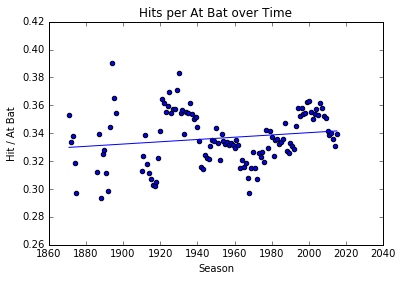

In [14]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["hits"] + batting_over_time["doubles"] + batting_over_time["triples"] + batting_over_time["HR"]) 
     / batting_over_time["atBats"])
plt.scatter(x, y)

plt.title("Hits per At Bat over Time")
plt.xlabel("Season")
plt.ylabel("Hit / At Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

Without the outlier our chart is much more effective at illustrating the data. First of all, it seems that the variance in our "batting efficiency" construct has decreased over time, with early years varying widely and later years less so. Second, if there is a trend, it is a very slightly positive one, with batting efficiency increasing over time. That may be a result of better batters or poorer pitchers, a combination of the two, or other, lurking variables, such as improved equipment. Obviously, cursory visual analysis alone is not sufficient to determine whether the trend is statistically significant at all. 

In [15]:
#Calculate Pearson's r, p-value of Pearson's r, and R^2 to determine significance of trend in batting efficiency over time

x = batting_over_time.index.values
y = ((batting_over_time["hits"] + batting_over_time["doubles"] + batting_over_time["triples"] + batting_over_time["HR"])
     / batting_over_time["atBats"])

r = st.pearsonr(x, y)[0]
p = st.pearsonr(x, y)[1]
r2 = r ** 2

print("Pearson's r for batting efficiency (hits / at-bat) over time is", r)
print("The p-value for Pearson's r is", p)
print("The R-squared is", r2)

Pearson's r for batting efficiency (hits / at-bat) over time is 0.167716406153
The p-value for Pearson's r is 0.0648167376669
The R-squared is 0.028128792893


Pearson's r is thus not significant at a confidence level of p < 0.05. We fail to reject the null hypothesis (that our batting efficiency construct has not significantly changed over time).

Now let us turn our attention to the second part of this preliminary question, whether the result, or magnitude, of hits has changed over time. That is to say, has the ratio between hits, doubles, triples, and home-runs changed over time. There are 6 different ratios to investigate (hits : doubles, hits : triples, doubles : triples, etc.); comparing the competing trends should help us to determine whether "bigger" hits have become more common over time. 

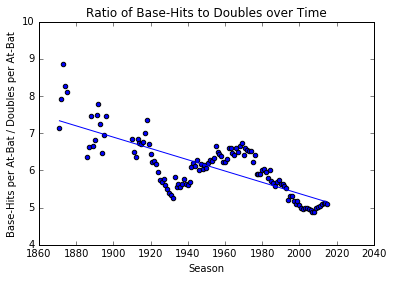

In [16]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["hits"] / batting_over_time["atBats"]) / (batting_over_time["doubles"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Base-Hits to Doubles over Time")
plt.xlabel("Season")
plt.ylabel("Base-Hits per At-Bat / Doubles per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

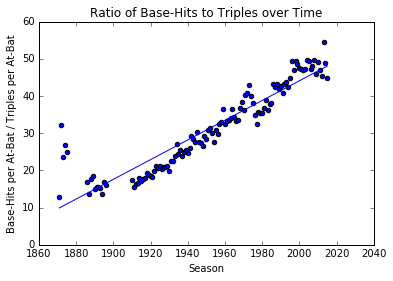

In [17]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["hits"] / batting_over_time["atBats"]) / (batting_over_time["triples"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Base-Hits to Triples over Time")
plt.xlabel("Season")
plt.ylabel("Base-Hits per At-Bat / Triples per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

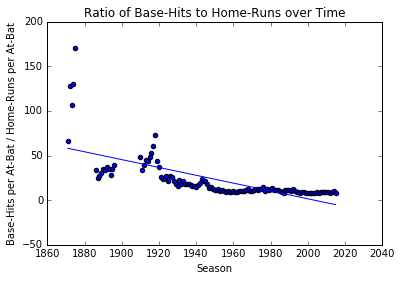

In [18]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["hits"] / batting_over_time["atBats"]) / (batting_over_time["HR"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Base-Hits to Home-Runs over Time")
plt.xlabel("Season")
plt.ylabel("Base-Hits per At-Bat / Home-Runs per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

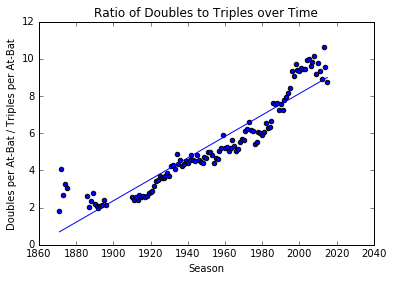

In [19]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["doubles"] / batting_over_time["atBats"]) / (batting_over_time["triples"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Doubles to Triples over Time")
plt.xlabel("Season")
plt.ylabel("Doubles per At-Bat / Triples per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

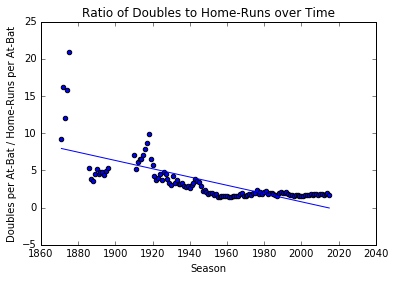

In [20]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["doubles"] / batting_over_time["atBats"]) / (batting_over_time["HR"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Doubles to Home-Runs over Time")
plt.xlabel("Season")
plt.ylabel("Doubles per At-Bat / Home-Runs per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

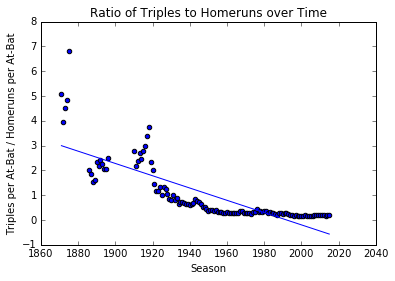

In [21]:
#Plot scatter

x = batting_over_time.index.values
y = ((batting_over_time["triples"] / batting_over_time["atBats"]) / (batting_over_time["HR"] / batting_over_time["atBats"]))
plt.scatter(x, y)

plt.title("Ratio of Triples to Homeruns over Time")
plt.xlabel("Season")
plt.ylabel("Triples per At-Bat / Homeruns per At-Bat")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

Let us quickly summarize: the ratio of doubles to base-hits and triples for each at-bat visually demonstrates a clear, positive linear relationship, which we will analyze in greater detail in a moment. The frequency of triples seems to have declined vis-a-vis base-hits and doubles over time. When it comes to home-runs, it seems that pre-1920, there was a relatively great degree of variance, and home-runs were relatively less common. Post-1920, the ratio of home-runs to base-hits, doubles, and triples, appears to be relatively constant. 

To wrap up this section, let's take a closer look at the rise of doubles over time.

In [22]:
#Calculate Pearson's r, p-value of Pearson's r, and R^2 to determine significance of increasing frequency of doubles over time

x = batting_over_time.index.values
y = ((batting_over_time["doubles"] / batting_over_time["atBats"]) / (batting_over_time["hits"] / batting_over_time["atBats"]))

r = st.pearsonr(x, y)[0]
p = st.pearsonr(x, y)[1]
r2 = r ** 2

print("Pearson's r for increasing frequency of doubles vis-a-vis base-hits per at-bat over time is", r)
print("The p-value for Pearson's r is", p)
print("The R-squared is", r2)

Pearson's r for increasing frequency of doubles vis-a-vis base-hits per at-bat over time is 0.762294996278
The p-value for Pearson's r is 2.01283166371e-24
The R-squared is 0.58109366135


Pearson's r is thus significant at a confidence level of p < 0.05. We can reject the null hypothesis (that the ratio of doubles : base-hits has not significantly changed over time).

In [23]:
#Calculate Pearson's r, p-value of Pearson's r, and R^2 to determine significance of increasing frequency of doubles over time

x = batting_over_time.index.values
y = ((batting_over_time["doubles"] / batting_over_time["atBats"]) / (batting_over_time["triples"] / batting_over_time["atBats"]))

r = st.pearsonr(x, y)[0]
p = st.pearsonr(x, y)[1]
r2 = r ** 2

print("Pearson's r for increasing frequency of doubles vis-a-vis triples per at-bat over time is", r)
print("The p-value for Pearson's r is", p)
print("The R-squared is", r2)

Pearson's r for increasing frequency of doubles vis-a-vis triples per at-bat over time is 0.933716173737
The p-value for Pearson's r is 2.28415711125e-55
The R-squared is 0.871825893097


Pearson's r is thus significant at a confidence level of p < 0.05. We can reject the null hypothesis (that the ratio of doubles : triples has not significantly changed over time).

In [24]:
#Calculate Pearson's r, p-value of Pearson's r, and R^2 to determine significance of decreasing frequency of triples over time

x = batting_over_time.index.values
y = ((batting_over_time["hits"] / batting_over_time["atBats"]) / (batting_over_time["triples"] / batting_over_time["atBats"]))

r = st.pearsonr(x, y)[0]
p = st.pearsonr(x, y)[1]
r2 = r ** 2

print("Pearson's r for decreasing frequency of triples vis-a-vis base-hits per at-bat over time is", r)
print("The p-value for Pearson's r is", p)
print("The R-squared is", r2)

Pearson's r for decreasing frequency of triples vis-a-vis base-hits per at-bat over time is 0.925272596791
The p-value for Pearson's r is 2.35996719311e-52
The R-squared is 0.856129378373


Pearson's r is thus significant at a confidence level of p < 0.05. We can reject the null hypothesis (that the ratio of base-hits : triples has not significantly changed over time).

To conclude the section, we can summarize the above findings as follows:

    1. Batting efficiency has not increased or decreased in a statistically significant way over time.
    2. The frequency of doubles at each bat has increased in a significant way vis-a-vis base-hits and triples over time.
    3. The frequency of triples at each bat has decreased in a significant way vis-a-vis base-hits and doubles over time.
    3. Home-runs were less common pre-1920, but their relative frequency has been fairly consistent ever since.
    
The above conclusions raise several questions, which would require further analysis beyond the scope of this inquiry in order to satisfactorily answer, namely:

    - Why have doubles increased in frequency relative to base-hits and triples over time?
    - Why have triples decreased in frequency relative to base-hits and doubles over time?
    - What difference arose in baseball around 1920 that made the frequency of home-runs more consistent?

### Question 2: Does stealing bases successfully correlate significantly with runs?

Because of the way RBI (runs batted in) is credited, it would be very difficult to determine whether successful base stealing played a role in any runs for the team as a whole. However, it should be possible to get an idea of whether stealing bases (well) is a good idea by comparing successful base stealing to runs scored by the player. We already dropped missing data relevant to this question (stolen bases) in the dfComplete dataframe, so we will use that here.

In [36]:
dfComplete.head()

,playerID,yearID,stint,teamID,lgID,games,atBats,runs,hits,doubles,...,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


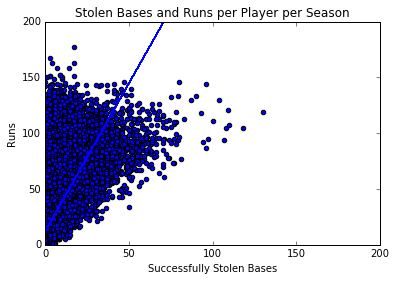

In [55]:
#Plot scatter

x = dfComplete.stolenBases
y = dfComplete.runs
plt.scatter(x, y)
plt.xlim([0,200])
plt.ylim([0,200])

plt.title("Stolen Bases and Runs per Player per Season")
plt.xlabel("Successfully Stolen Bases")
plt.ylabel("Runs")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

It is not clear that Pearson's correlation coefficient would be the appropriate measure of the relationship between these two variables. First of all, the relationship depicted in the scatterplot is not clearly linear. Second, the two variables appear to exhibit some fairly strong heteroscedasticity. As those two characteristics violate the assumptions of using a Pearson coefficient to measure correlation, we will try to establish a measure of the monotonic relationship with a Spearman correlation instead.

In [39]:
#Calculate Spearman's rho and p-value of Spearman's rho to determine significance of correlation between stealing and runs

x = dfComplete.stolenBases
y = dfComplete.runs

rho = st.spearmanr(x, y)[0]
p = st.spearmanr(x, y)[1]

print("Spearman's rho for stolen bases and runs is", r)
print("The p-value for Spearman's r is", p)

Spearman's rho for stolen bases and runs is 0.771110831427
The p-value for Spearman's r is 0.0


To be perfectly honest, the p-value of 0 here surprised me at first, and I thought that something was wrong. After doing some reading (this forum thread in particular proved to be a point in the right direction: https://www.researchgate.net/post/Question_about_Correlation_Analysis_I_got_the_significant_p005_however_the_R_only_indicated_a_weak_correlation_r015_Why) and thinking about the math at play, however, it is not so surprising. With so much data to work with (N > 80000), almost any correlation would be significant. What might be a more useful interpretation would involve the rather strong effect size of rho > .75. It seems that, understandably, stealing bases successfully does correlate with a player's runs overall. Nonetheless, determining whether it is a good strategy would require not only an analysis of unsuccessful base-stealing, but also a measure similar to RBI which took into account stealing's impact on the team as a whole, which we don't have access to. For now we will have to content ourselves with the suggestion that stealing is a reasonable strategy.

### Question 3: Is there a statistically significant correlation between home-runs and intentional walks?

Let us move on to question 3: do players who hit more home-runs in a given season get walked intentionally at a significant rate? Intentional walks were one of the variables with a lot of missing data, so we will create a new dataframe to answer this question with those NA values dropped in order to preserve the rest of the dataset for other questions.

In [63]:
walks = dfComplete.dropna(subset=['intentionalWalks'])

walks.describe()

C:\Users\Josh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
count,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59548.000000,59551.000000
mean,1988.727267,1.078559,54.277384,140.529936,18.126511,36.382035,6.495131,0.883345,3.714187,17.071793,2.514372,1.209637,13.487995,24.589204,1.214456,1.064708,1.580406,1.148418,3.155782
std,18.784122,0.284403,47.858507,186.366574,27.291049,52.169546,9.915144,1.846470,7.303818,26.653186,6.845256,2.608522,21.188054,32.108292,2.896120,2.279268,2.739650,2.020477,4.837170
min,1877.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,1.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1992.000000,1.000000,37.000000,44.000000,3.000000,7.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,10.500000,0.000000,0.000000,0.000000,NaN,NaN
75%,2005.000000,1.000000,86.000000,229.000000,27.000000,57.000000,10.000000,1.000000,4.000000,25.000000,2.000000,1.000000,20.000000,37.000000,1.000000,1.000000,2.000000,NaN,NaN
max,2015.000000,4.000000,165.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,130.000000,42.000000,232.000000,223.000000,120.000000,50.000000,40.000000,18.000000,36.000000


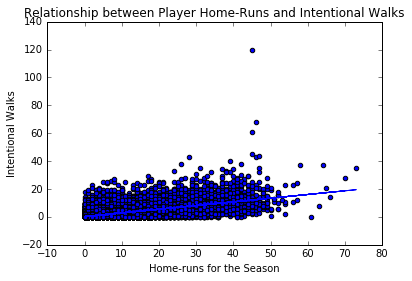

In [64]:
#Plot scatter

x = walks.HR
y = walks.intentionalWalks
plt.scatter(x, y)

plt.title("Relationship between Player Home-Runs and Intentional Walks")
plt.xlabel("Home-runs for the Season")
plt.ylabel("Intentional Walks")

#Plot trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m * x + b), '-')

plt.show()

We have a clear outlier here, where one player seems to have been walked intentionally a whopping 120+ times in a single year! Let's take a closer look.

In [65]:
walks.intentionalWalks.argmax()

84759

In [66]:
walks.loc[84759]

playerID            bondsba01
yearID                   2004
stint                       1
teamID                    SFN
lgID                       NL
games                     147
atBats                    373
runs                      129
hits                      135
doubles                    27
triples                     3
HR                         45
RBI                       101
stolenBases                 6
caughtStealing              1
BB                        232
strikeOuts                 41
intentionalWalks          120
hitByPitch                  9
SH                          0
SF                          3
GIDP                        5
Name: 84759, dtype: object

I'm pretty sure I recognize this player already, but let's take a look at the master list to make sure I'm not mistaken.

In [67]:
path = "C:\\Users\\Josh\\Documents\\Intro to Data Analysis\\baseballdatabank-master\\core\\Master.csv"

master = pd.read_csv(path)

master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [68]:
master[master.playerID == "bondsba01"]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
1526,bondsba01,1964.0,7.0,24.0,USA,CA,Riverside,NaN,NaN,NaN,...,Bonds,Barry Lamar,185.0,73.0,L,L,1986-05-30,2007-09-26,bondb001,bondsba01


I wasn't mistaken. The record refers to one Barry Bonds, who, according to Wikipedia, "holds many MLB hitting records, including most career home runs, most home runs in a single season (73, set in 2001) and most career walks" (https://en.wikipedia.org/wiki/Barry_Bonds). So it's not a great surprise that Bonds is the outlier here, but still, there have been plenty of incredible home-run hitters in MLB history, and they weren't walked intentionally 120 times. This may be a matter of when and how comprehensively intentional walk statistics have been recorded, since Bonds is a fairly recent player. 

I debated taking a look at the descriptive statistics of intentional walks and dropping Bonds' 2004 season along with any other datapoints that are more than 3 standard deviations away from the mean, but in a way, outliers like Bonds are exactly what we're trying to investigate here, since it's exactly extraordinary players like Bonds that one would expect pitchers to walk intentionally. Instead of dropping the data, I'm going to use Spearman's rank correlation again, since it is quite robust to outliers.

In [69]:
#Calculate Spearman's rho and p-value of Spearman's rho to determine significance of correlation between home-runs and getting walked

x = walks.HR
y = walks.intentionalWalks

r = st.spearmanr(x, y)[0]
p = st.spearmanr(x, y)[1]

print("Spearman's rho for home-runs and intentional walks is", r)
print("The p-value for Spearman's rho is", p)

Spearman's rho for home-runs and intentional walks is 0.731048475675
The p-value for Spearman's rho is 0.0


As with the investigation into base-stealing, we see that our very large dataset has resulted in the return of a p-value of 0. And once again, Spearman's rho demonstrates a fairly strong effect size > .70. It seems that there is a correlation between intentional walks and homeruns, which is to say that the data backs up the fact (although it doesn't prove) that pitchers are intentionally walking the right kind of players, as one would expect.

### Question 3: Have some players been hit by pitches more than others?

I want to move away from questions of correlation for a moment, so let's have some fun. Have there been any players in baseball history who have been hit by pitches more frequently than chance can likely explain? Let's begin by creating a new dataframe, called targets, and dropping missing data that's relevant to the analysis. Then let's group the data by player, and drop data for players who only batted a couple of times.

In [70]:
targets = df.dropna(subset=["atBats", "hitByPitch"])
targets = targets.groupby("playerID").sum()
targets = targets[targets.atBats > 25]

targets.describe()

C:\Users\Josh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID,stint,games,atBats,runs,hits,doubles,triples,HR,RBI,stolenBases,caughtStealing,BB,strikeOuts,intentionalWalks,hitByPitch,SH,SF,GIDP
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,8418.000000,10988.000000,10150.000000,6462.000000,10988.000000,10363.000000,6502.000000,7753.000000
mean,14029.635329,7.727248,427.989625,1269.212778,167.498453,332.895158,56.507190,11.489079,25.640699,152.600200,26.957226,11.333809,119.220513,184.488079,11.190344,9.439661,21.126508,10.630268,28.955114
std,10144.965048,5.732402,526.398226,1903.716113,286.425137,540.771028,96.473009,22.863113,63.089561,270.046481,69.124673,22.929856,214.551503,278.552704,27.010382,19.327303,35.788204,18.560490,46.752009
min,1884.000000,1.000000,6.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5801.000000,3.000000,70.000000,106.000000,9.000000,20.000000,3.000000,0.000000,0.000000,7.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,11696.500000,6.000000,211.000000,385.000000,37.000000,77.000000,12.000000,2.000000,2.000000,31.000000,3.000000,NaN,25.000000,NaN,NaN,2.000000,NaN,NaN,NaN
75%,20105.000000,11.000000,568.000000,1552.250000,183.000000,390.000000,63.000000,12.000000,18.000000,165.250000,19.000000,NaN,129.000000,NaN,NaN,10.000000,NaN,NaN,NaN
max,57754.000000,39.000000,3562.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,2297.000000,1406.000000,335.000000,2558.000000,2597.000000,688.000000,287.000000,512.000000,128.000000,350.000000


In [71]:
#Calculate mean and standard deviation of frequency of getting hit by a pitch

targets.hitByPitch.mean(), targets.hitByPitch.std()

(9.439661448853295, 19.32730305200211)

In [72]:
#Compensate for varying at-bats

hit_per_bat = targets.hitByPitch / targets.atBats

hit_per_bat.head()

playerID
aaronha01    0.002588
aaronto01    0.000000
abbated01    0.010841
abbeybe01    0.000000
abbeych01    0.013135
dtype: float64

In [73]:
#Recalculate mean and standard deviation using hit_per_bat

hit_per_bat.mean(), hit_per_bat.std()

(0.006552418579969279, 0.008387527013187056)

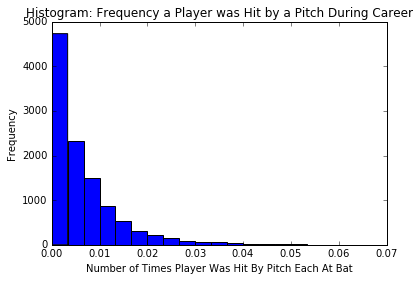

In [83]:
#Plot histogram

plt.hist(hit_per_bat, bins=30)

plt.xlim([0,0.07])

plt.title("Histogram: Frequency a Player was Hit by a Pitch During Career")
plt.xlabel("Number of Times Player Was Hit By Pitch Each At Bat")
plt.ylabel("Frequency")

plt.show()

The data is clearly skewed positively, with most players never getting hit by a pitch in their entire careers. Thus we cannot rely on a z-test to determine statistical significance, and must choose a nonparametric test instead. First let's investigate those players who were potentially targeted at a significant rate.

In [78]:
hit_per_bat.argmax()

'hillbe01'

In [79]:
targets.loc["hillbe01"]

yearID              1890.0
stint                  1.0
games                  9.0
atBats                30.0
runs                   3.0
hits                   5.0
doubles                2.0
triples                0.0
HR                     0.0
RBI                    2.0
stolenBases            6.0
caughtStealing         NaN
BB                     3.0
strikeOuts             NaN
intentionalWalks       NaN
hitByPitch             3.0
SH                     NaN
SF                     NaN
GIDP                   NaN
Name: hillbe01, dtype: float64

First of all, who is this "chounch01"?

In [80]:
master[master.playerID == "hillbe01"]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
7585,hillbe01,1864.0,8.0,24.0,USA,IL,Kewanee,1934.0,10.0,22.0,...,Hill,Belden L.,170.0,70.0,R,R,1890-08-27,1890-09-04,hillb101,hillbe01


Alright, that looks like a data point we can work with: Belden Hill, who batted 30 times and was hit 3 of them. But how likely is it that that was just bad luck? As stated above, we now must choose a hypothesis test given the non-normal distribution of the data. But first, let's take a quick turn back to descriptive stats: the data is non-normal, so the median is a more useful measure of central tendency than the mean. Let's first calculate 'hit_per_bat' median. Then let's demonstrate that the median is more indicative of the bulk of the data than the mean by plotting both on our histogram.

In [81]:
hit_per_bat.median()

0.004366812227074236

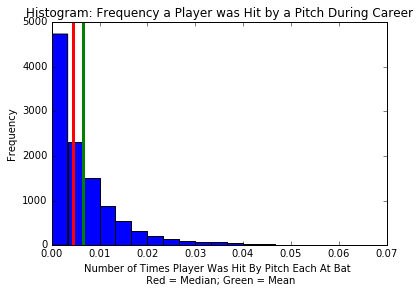

In [82]:
#Plot histogram

plt.hist(hit_per_bat, bins=30)

plt.xlim([0,0.07])

plt.title("Histogram: Frequency a Player was Hit by a Pitch During Career")
plt.xlabel("Number of Times Player Was Hit By Pitch Each At Bat \n Red = Median; Green = Mean")
plt.ylabel("Frequency")

plt.axvline(x=hit_per_bat.mean(), linewidth=3, color='g')
plt.axvline(x=hit_per_bat.median(), linewidth=3, color='r')

plt.show()

Now, my first thought was to log-transform this data to approximate normality, before moving on to more traditional hypothesis tests on the log data. However, with the spike of zero-values, that is actually quite a challenging problem. It seems that there are numerous techniques, many of which are summarized here: http://robjhyndman.com/hyndsight/transformations/. I have chosen to attempt the mixture model approach, which is concisely described in the abstract to this paper: http://link.springer.com/article/10.1007/s10651-005-6817-1. First of all, I will separate out the non-zero values and transform them.

In [84]:
non_zero = hit_per_bat[hit_per_bat > 0]

In [118]:
#Log-transform, multiplying each value by 10000 to avoid negative logarithms

log_hit_per_bat = np.log10(non_zero * 10000)

log_hit_per_bat.head()

playerID
aaronha01    1.412991
abbated01    2.035069
abbeych01    2.118442
abbotfr01    2.192973
abbotje01    1.701875
dtype: float64

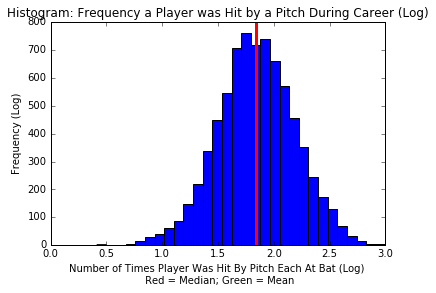

In [119]:
#Plot histogram

plt.hist(log_hit_per_bat, bins=30)

plt.title("Histogram: Frequency a Player was Hit by a Pitch During Career (Log)")
plt.xlabel("Number of Times Player Was Hit By Pitch Each At Bat (Log) \n Red = Median; Green = Mean")
plt.ylabel("Frequency (Log)")

plt.axvline(x=log_hit_per_bat.mean(), linewidth=3, color='g')
plt.axvline(x=log_hit_per_bat.median(), linewidth=3, color='r')

plt.show()

That's certainly looking more like a distribution which can satisfy assumptions of normality.

Now, keeping the complication of the zeroes to the side for a moment, let's return to Belden Hill and see where his log transformed value falls on the standardized distribution.

In [120]:
hill = log_hit_per_bat["hillbe01"]

hill

3.0

In [121]:
mean = log_hit_per_bat.mean()
std = log_hit_per_bat.std()

hill_z = (hill - mean) / std

hill_z

3.3343409238412844

In [122]:
p = st.norm.cdf(hill_z)

p

0.99957249104550194

Thus for our preliminary inquiry based only on the log-transformed non-zero data, Hill's rate of getting hit by pitches is significant at a one-tailed alpha of p < 0.01.